In [7]:
%config IPCompleter.greedy=True
import os
os.chdir("D:\\")
print(os.getcwd())

D:\


In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age',
          'label']
pima=pd.read_csv("diabetes.csv",header=0,names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
X=pima.iloc[:,:8]
X.head()
y=pima.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [26]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [27]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.683982683982684


In [28]:
print("accuracy:",metrics.accuracy_score(y_pred,y_test))


accuracy: 0.683982683982684


In [30]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [39]:
dot_data=StringIO()
feature_cols=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age']
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

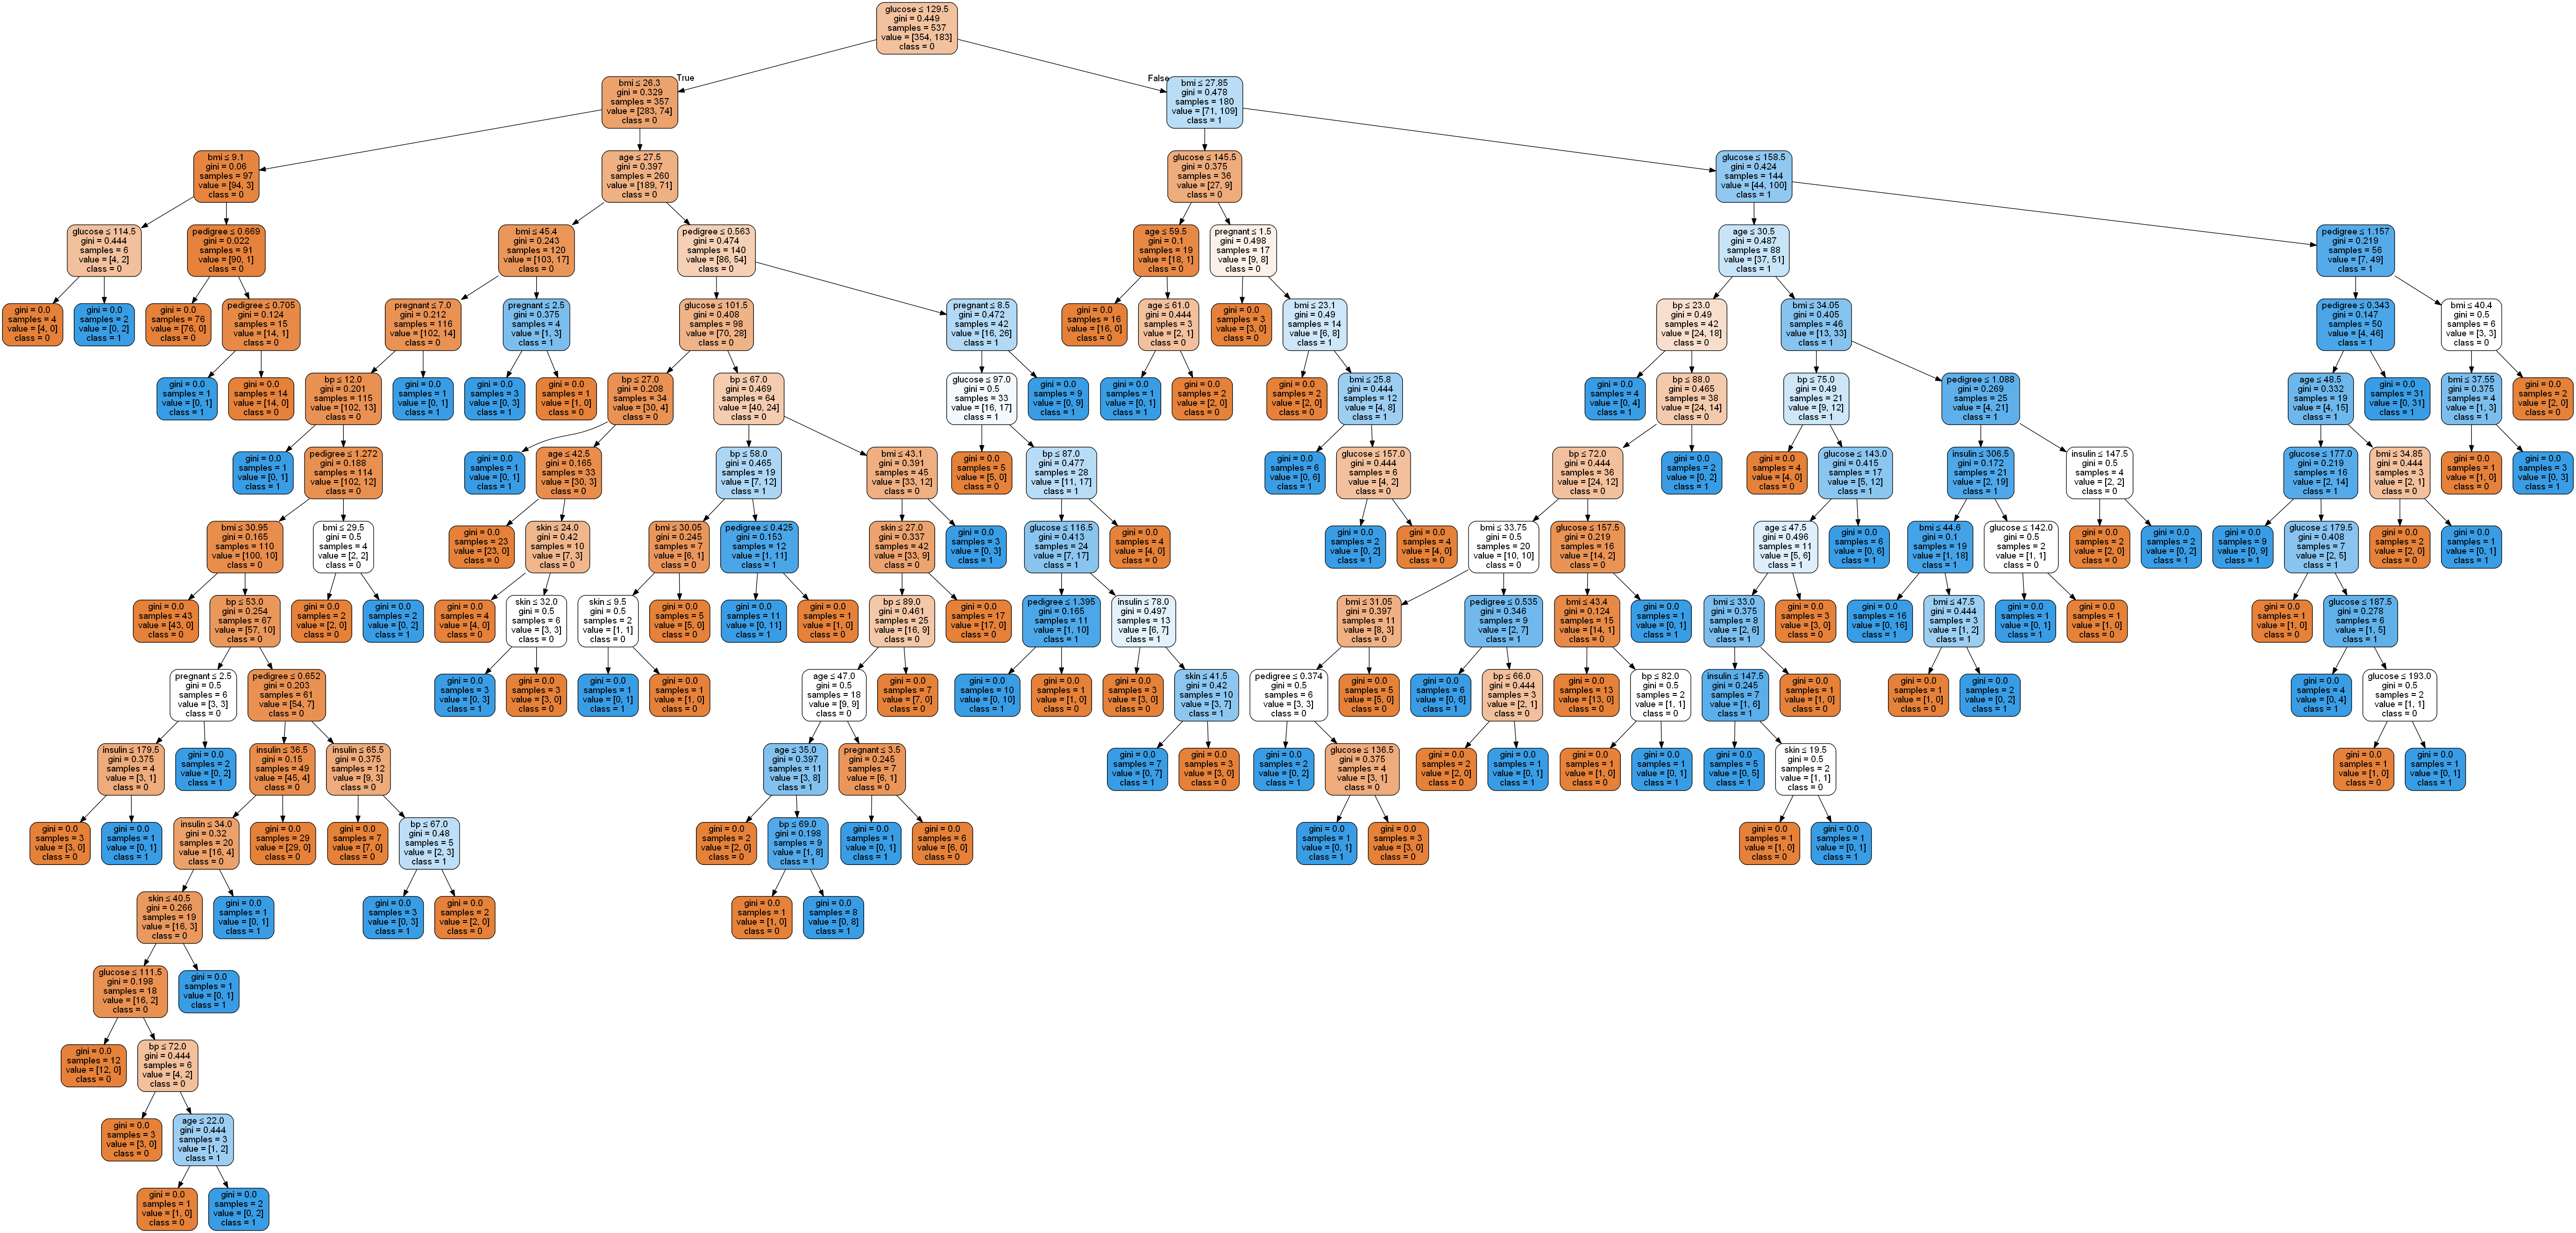

In [41]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [43]:
clf=DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7705627705627706


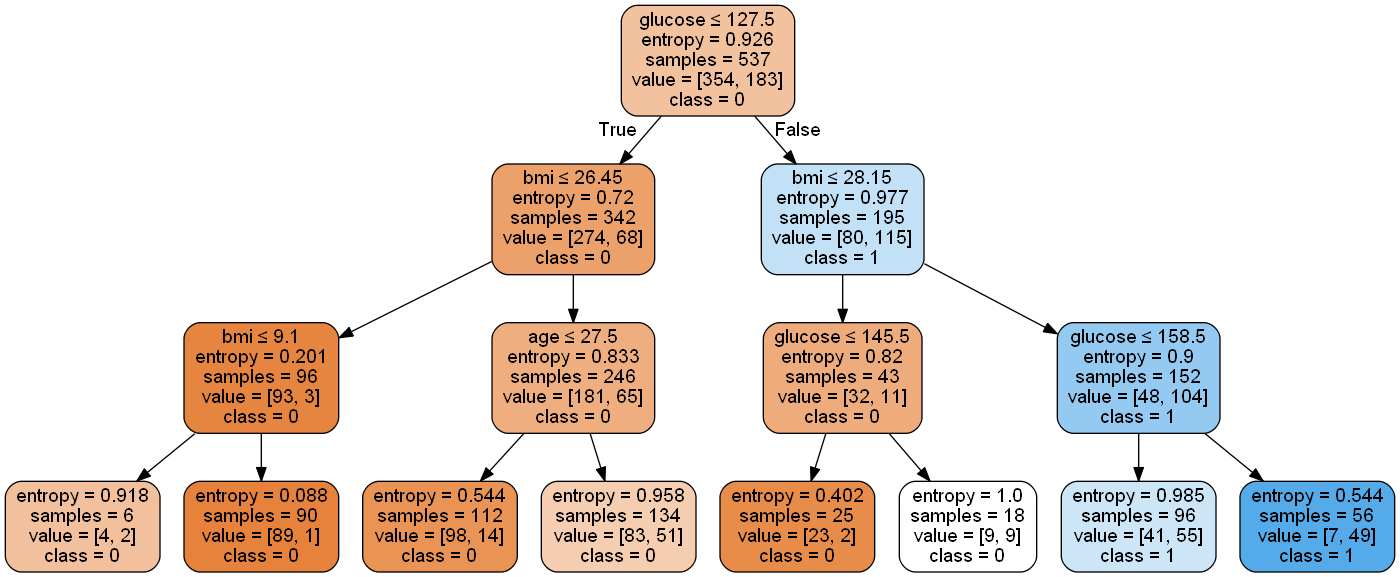

In [44]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree,metrics

In [62]:
data=pd.read_csv('car_evaluation.csv',header=0,names=['buying','maint','doors','persons','log_boot','safety','class'])
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
log_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [68]:
data.head()

,buying,maint,doors,persons,log_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [69]:
data['class'],class_names=pd.factorize(data['class'])

In [71]:
print(class_names)
print(data['class'].unique())

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
[0 1 2 3]


In [75]:
data['buying'],_ =pd.factorize(data['buying'])
data['maint'],_ =pd.factorize(data['maint'])
data['doors'],_=pd.factorize(data['doors'])
data['persons'],_=pd.factorize(data['persons'])
data['log_boot'],_=pd.factorize(data['log_boot'])
data['safety'],_=pd.factorize(data['safety'])
data.head()

,buying,maint,doors,persons,log_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int64
persons     1728 non-null int64
log_boot    1728 non-null int64
safety      1728 non-null int64
class       1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


In [85]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [87]:
dtree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

In [88]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [89]:
y_pred=dtree.predict(X_test)

In [90]:
count_misclassified=(y_test != y_pred).sum()

In [91]:
print(count_misclassified)

96


In [92]:
print('Misclassified samples:{}'.format(count_misclassified))

Misclassified samples:96


In [93]:
print('Misclassified samples:',count_misclassified)

Misclassified samples: 96


In [95]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [96]:
print('accuracy:',accuracy)

accuracy: 0.815028901734104


In [97]:
import seaborn as sns

In [102]:
data=pd.read_csv("loan_data.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [103]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [105]:
data.sample(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
3207,1,debt_consolidation,0.0932,204.46,10.596635,24.00,737,5430.000000,30540,54.3,0,0,0,0
8493,0,debt_consolidation,0.1576,437.99,11.482466,11.84,652,4079.958333,21861,88.1,2,0,0,0
1304,1,debt_consolidation,0.1146,263.66,11.289782,21.72,697,7577.000000,73150,72.9,0,0,0,1
6420,1,debt_consolidation,0.1426,82.34,10.268131,19.13,662,5220.041667,2041,70.4,0,0,1,1
79,1,all_other,0.1091,130.79,9.798127,18.00,707,2192.000000,5533,79.6,1,0,0,0


In [106]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

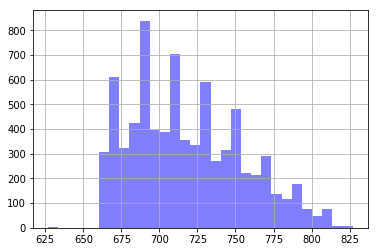

In [110]:
data[data['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='credit.policy=1')

In [128]:
data.[['credit.policy'==1,'installment','purpose']]

KeyError: '[False] not in index'

Text(0.5, 0, 'FICO')

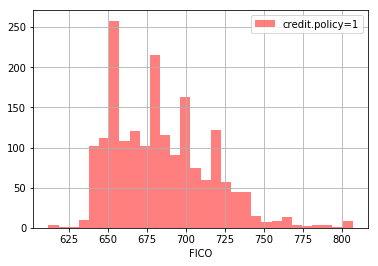

In [171]:
data[data['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='credit.policy=1')
plt.legend()
plt.xlabel('FICO')

In [132]:
data['purpose']

0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
5              credit_card
6       debt_consolidation
7                all_other
8         home_improvement
9       debt_consolidation
10      debt_consolidation
11      debt_consolidation
12      debt_consolidation
13          small_business
14      debt_consolidation
15          major_purchase
16               all_other
17             credit_card
18      debt_consolidation
19          major_purchase
20               all_other
21               all_other
22             credit_card
23             credit_card
24      debt_consolidation
25               all_other
26               all_other
27      debt_consolidation
28               all_other
29               all_other
               ...        
9548      home_improvement
9549      home_improvement
9550             all_other
9551      home_improvement
9552    debt_consolidation
9553    debt_consolidation
9

In [133]:
categorical_var=['purpose']

In [134]:
print(categorical_var)

['purpose']


In [135]:
categorical_var=['purpose']
loan_data2 = pd.get_dummies(data=data,columns=categorical_var,drop_first=True)
loan_data2.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [136]:
data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [145]:
X=loan_data2.drop('not.fully.paid',axis=1)
y=loan_data2['not.fully.paid']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=2)

In [148]:
loanTree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [151]:
pred_y=loanTree.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,precision_score
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2399
           1       0.50      0.01      0.02       475

   micro avg       0.83      0.83      0.83      2874
   macro avg       0.67      0.50      0.46      2874
weighted avg       0.78      0.83      0.76      2874



In [153]:
print(confusion_matrix(y_test,pred_y))

[[2395    4]
 [ 471    4]]
